Exercitiul 1

In [1]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

In [3]:
X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=0.15, random_state=42)


In [19]:
ocsvm_model = OCSVM(kernel='linear', contamination=0.3)
ocsvm_model.fit(X_train)

y_test_pred = ocsvm_model.predict(X_test)

print(y_test_pred.shape)
balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"ba: {balanced_acc}")
print(f"roc auc: {roc_auc}")


(200,)
ba: 0.9323529411764706
roc auc: 0.9323529411764706


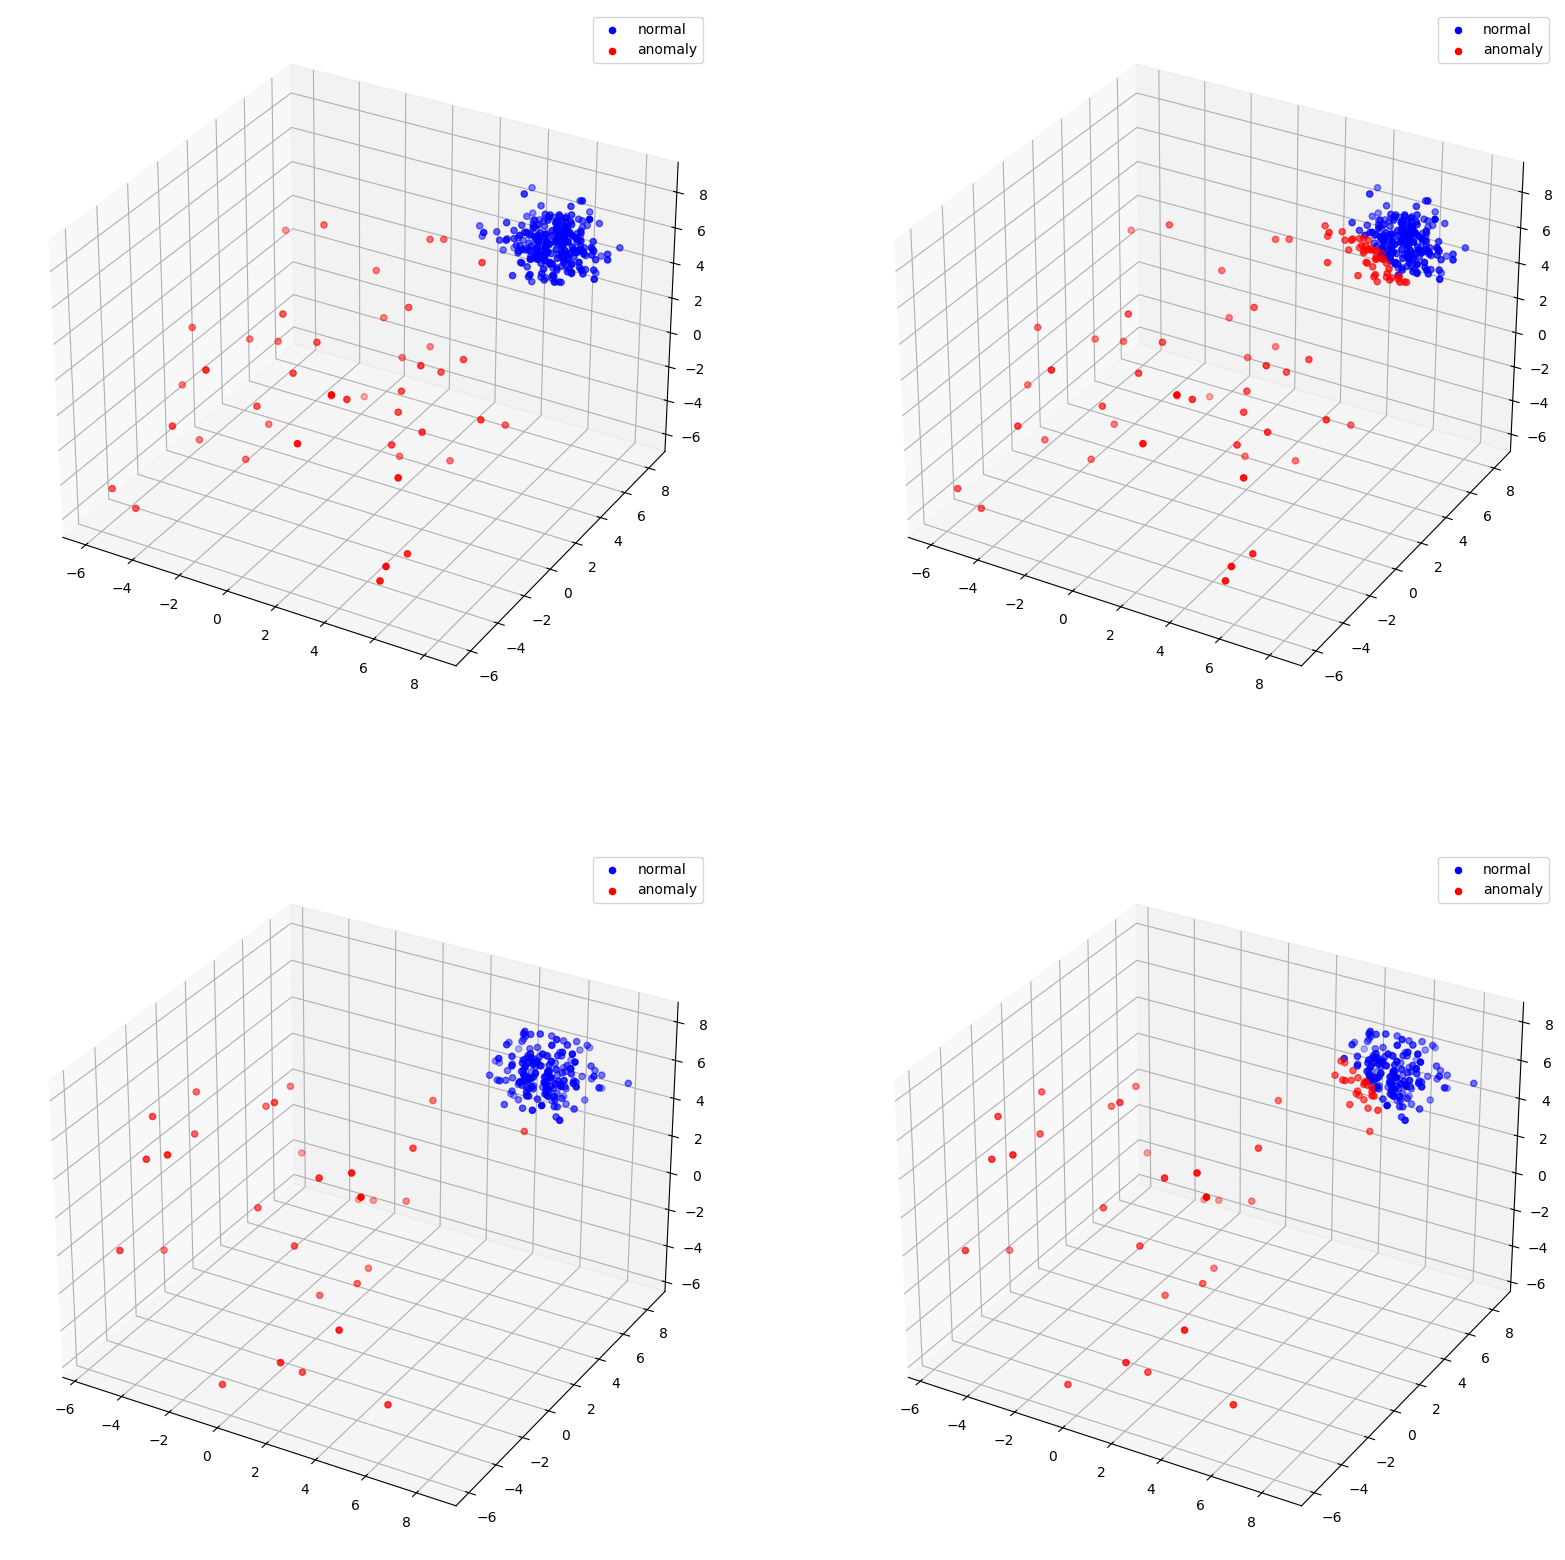

In [20]:
fig, axes = plt.subplots(2, 2, subplot_kw={"projection": "3d"}, figsize=(20,20))
# train data - ground truth
axes[0, 0].scatter(X_train[y_train == 0 ][:, 0], X_train[y_train==0][:, 1], X_train[y_train==0][:, 2], c='blue', label='normal')
axes[0, 0].scatter(X_train[y_train == 1 ][:, 0], X_train[y_train==1][:, 1], X_train[y_train==1][:, 2], c='red', label='anomaly')
axes[0,0].legend()
# train data - prediction
axes[0, 1].scatter(X_train[ocsvm_model.labels_ == 0 ][:, 0], X_train[ocsvm_model.labels_==0][:, 1], X_train[ocsvm_model.labels_==0][:, 2], c='blue', label='normal')
axes[0, 1].scatter(X_train[ocsvm_model.labels_ == 1 ][:, 0], X_train[ocsvm_model.labels_==1][:, 1], X_train[ocsvm_model.labels_==1][:, 2], c='red', label='anomaly')
axes[0,1].legend()
# test data - ground truth
axes[1,0].scatter(X_test[y_test == 0 ][:, 0], X_test[y_test==0][:, 1], X_test[y_test==0][:, 2], c='blue', label='normal')
axes[1,0].scatter(X_test[y_test == 1 ][:, 0], X_test[y_test==1][:, 1], X_test[y_test==1][:, 2], c='red', label='anomaly')
axes[1,0].legend()
#test data - prediction
axes[1,1].scatter(X_test[y_test_pred == 0 ][:, 0], X_test[y_test_pred==0][:, 1], X_test[y_test_pred==0][:, 2], c='blue', label='normal')
axes[1,1].scatter(X_test[y_test_pred == 1 ][:, 0], X_test[y_test_pred==1][:, 1], X_test[y_test_pred==1][:, 2], c='red', label='anomaly')
axes[1,1].legend()  

In [21]:
ocsvm_rbf = OCSVM(kernel='rbf', contamination=0.3)
ocsvm_rbf.fit(X_train)

y_test_pred_rbf = ocsvm_rbf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_test_pred_rbf)
print(f"ba: {balanced_acc}")

ba: 0.8852941176470588


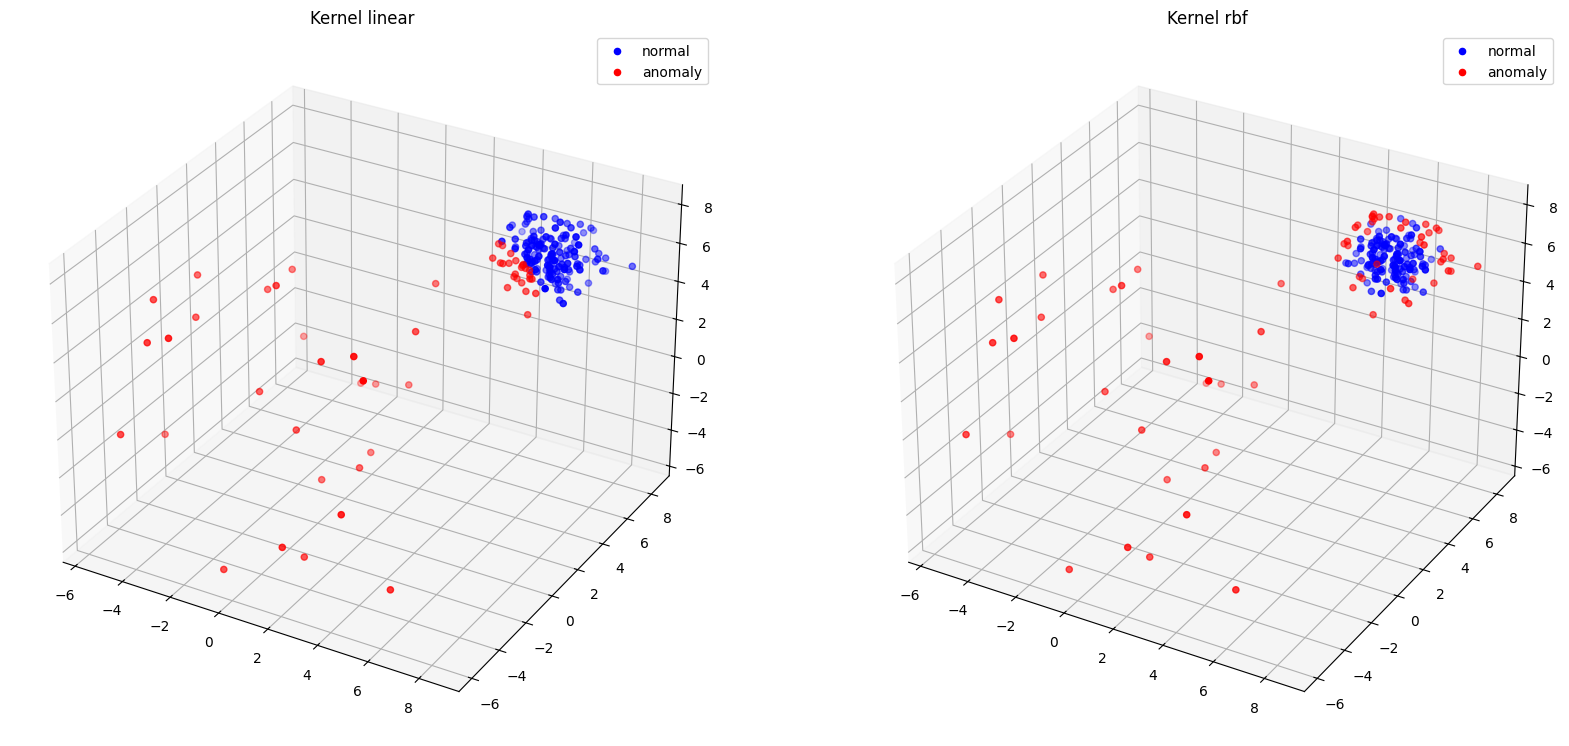

In [22]:
fig, axes = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(20,20))
#test data - prediction - kernel linea
axes[0].scatter(X_test[y_test_pred == 0 ][:, 0], X_test[y_test_pred==0][:, 1], X_test[y_test_pred==0][:, 2], c='blue', label='normal')
axes[0].scatter(X_test[y_test_pred == 1 ][:, 0], X_test[y_test_pred==1][:, 1], X_test[y_test_pred==1][:, 2], c='red', label='anomaly')
axes[0].set_title('Kernel linear')
axes[0].legend()  
#test data - prediction - kernel rbf
axes[1].scatter(X_test[y_test_pred_rbf == 0 ][:, 0], X_test[y_test_pred_rbf==0][:, 1], X_test[y_test_pred_rbf==0][:, 2], c='blue', label='normal')
axes[1].scatter(X_test[y_test_pred_rbf == 1 ][:, 0], X_test[y_test_pred_rbf==1][:, 1], X_test[y_test_pred_rbf==1][:, 2], c='red', label='anomaly')
axes[1].set_title('Kernel rbf')
axes[1].legend()

In [2]:
from pyod.models.deep_svdd import DeepSVDD

In [26]:
deep_svdd = DeepSVDD(n_features=3, contamination=0.3,epochs=50)
deep_svdd.fit(X_train)

y_test_pred_deep_svdd = ocsvm_rbf.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_test_pred_deep_svdd)
print(f"ba: {balanced_acc}")

Epoch 1/50, Loss: 10.788229405879974
Epoch 2/50, Loss: 10.33095172047615
Epoch 3/50, Loss: 10.294324681162834
Epoch 4/50, Loss: 10.904645264148712
Epoch 5/50, Loss: 10.299786642193794
Epoch 6/50, Loss: 11.103966295719147
Epoch 7/50, Loss: 10.688485085964203
Epoch 8/50, Loss: 10.459155797958374
Epoch 9/50, Loss: 11.020922243595123
Epoch 10/50, Loss: 11.333521068096161
Epoch 11/50, Loss: 10.780196726322174
Epoch 12/50, Loss: 11.175166249275208
Epoch 13/50, Loss: 10.327726632356644
Epoch 14/50, Loss: 11.542130589485168
Epoch 15/50, Loss: 10.892174184322357
Epoch 16/50, Loss: 11.040426254272461
Epoch 17/50, Loss: 10.812265574932098
Epoch 18/50, Loss: 11.57275801897049
Epoch 19/50, Loss: 11.856447398662567
Epoch 20/50, Loss: 12.943823367357254
Epoch 21/50, Loss: 11.180062711238861
Epoch 22/50, Loss: 10.6724593937397
Epoch 23/50, Loss: 11.044032007455826
Epoch 24/50, Loss: 10.634301602840424
Epoch 25/50, Loss: 11.704054072499275
Epoch 26/50, Loss: 11.727753400802612
Epoch 27/50, Loss: 11.398

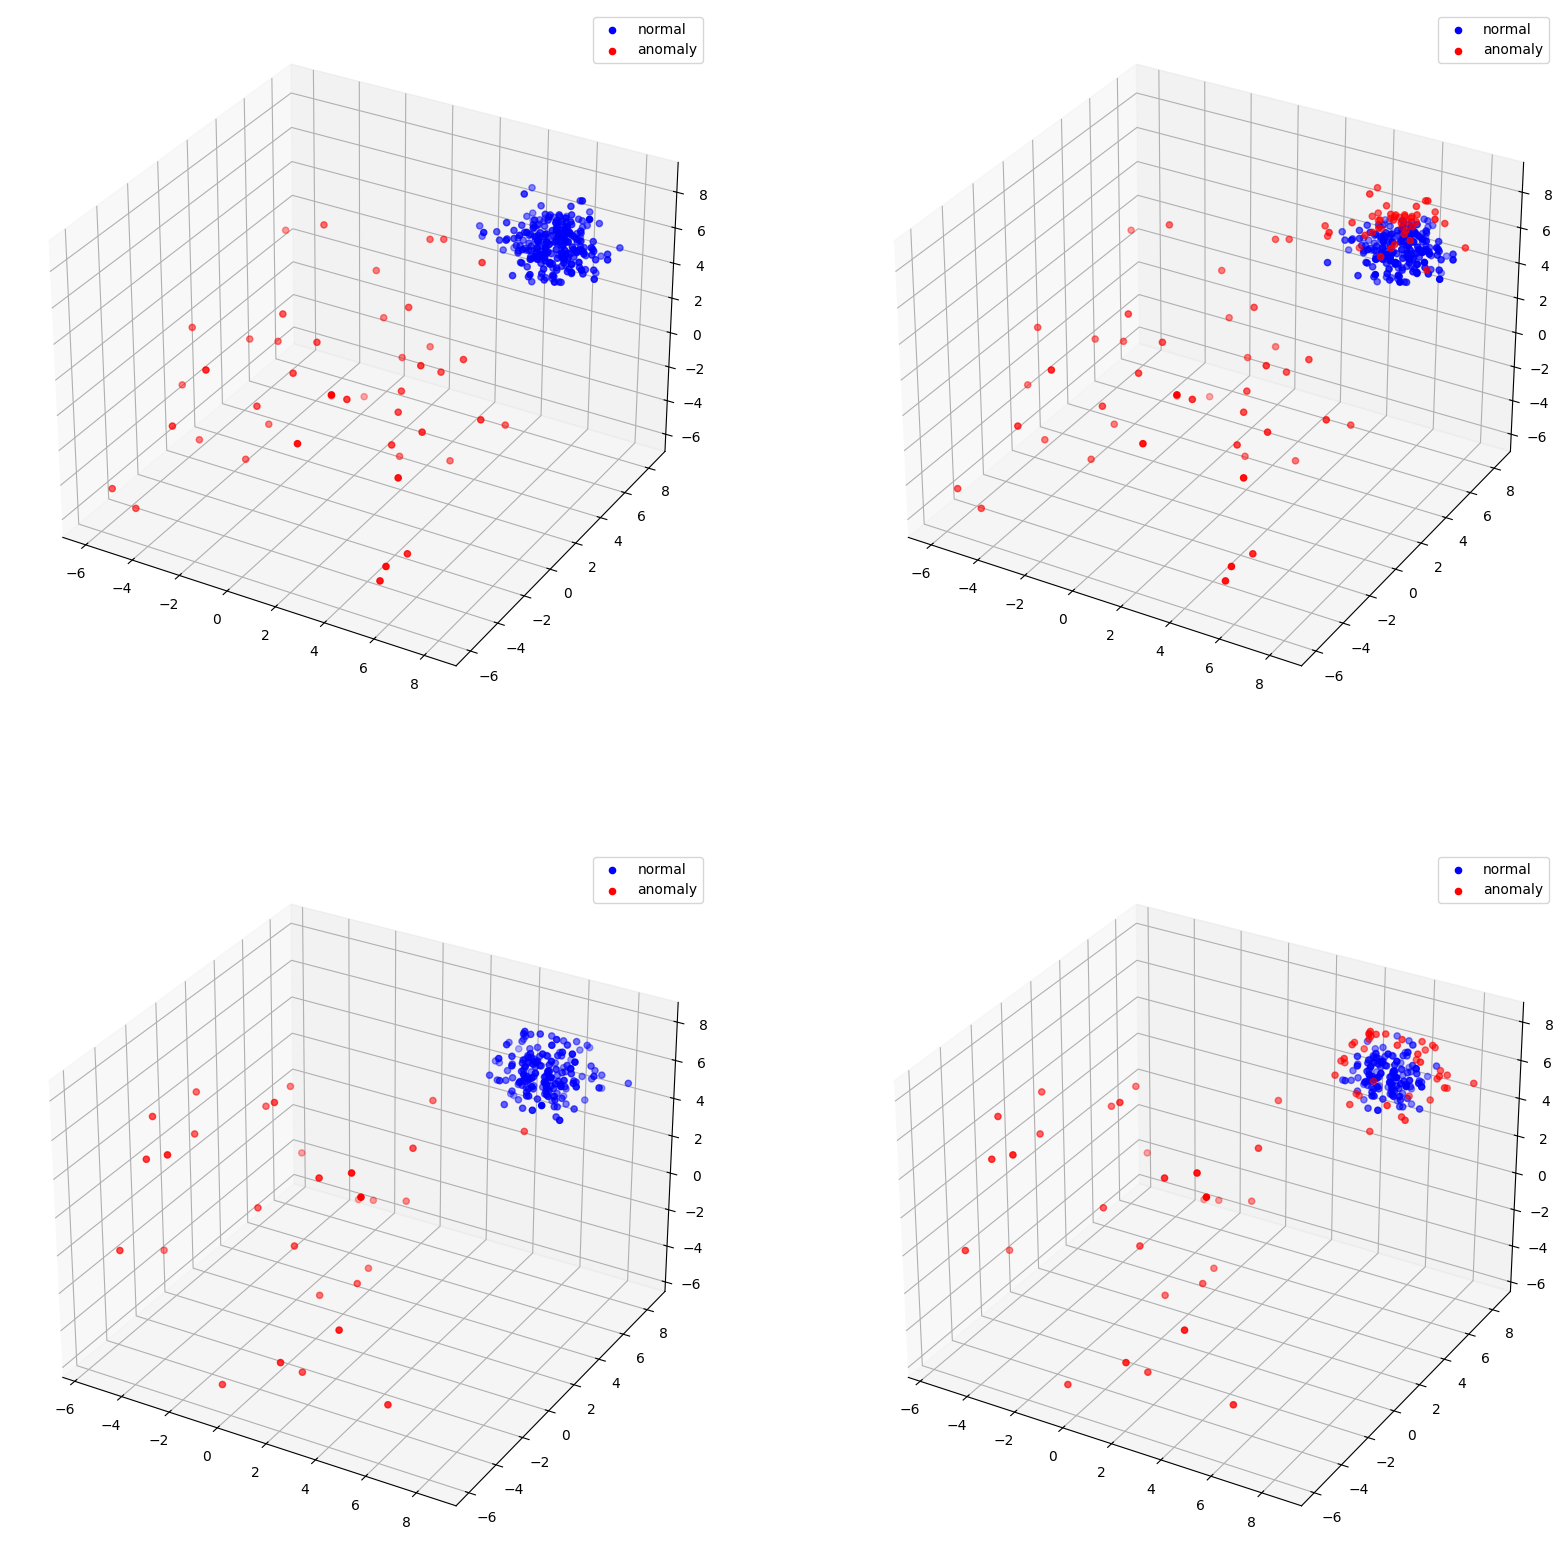

In [27]:
fig, axes = plt.subplots(2, 2, subplot_kw={"projection": "3d"}, figsize=(20,20))
# train data - ground truth
axes[0, 0].scatter(X_train[y_train == 0 ][:, 0], X_train[y_train==0][:, 1], X_train[y_train==0][:, 2], c='blue', label='normal')
axes[0, 0].scatter(X_train[y_train == 1 ][:, 0], X_train[y_train==1][:, 1], X_train[y_train==1][:, 2], c='red', label='anomaly')
axes[0,0].legend()
# train data - prediction
axes[0, 1].scatter(X_train[deep_svdd.labels_ == 0 ][:, 0], X_train[deep_svdd.labels_==0][:, 1], X_train[deep_svdd.labels_==0][:, 2], c='blue', label='normal')
axes[0, 1].scatter(X_train[deep_svdd.labels_ == 1 ][:, 0], X_train[deep_svdd.labels_==1][:, 1], X_train[deep_svdd.labels_==1][:, 2], c='red', label='anomaly')
axes[0,1].legend()
# test data - ground truth
axes[1,0].scatter(X_test[y_test == 0 ][:, 0], X_test[y_test==0][:, 1], X_test[y_test==0][:, 2], c='blue', label='normal')
axes[1,0].scatter(X_test[y_test == 1 ][:, 0], X_test[y_test==1][:, 1], X_test[y_test==1][:, 2], c='red', label='anomaly')
axes[1,0].legend()
#test data - prediction
axes[1,1].scatter(X_test[y_test_pred_deep_svdd == 0 ][:, 0], X_test[y_test_pred_deep_svdd==0][:, 1], X_test[y_test_pred_deep_svdd==0][:, 2], c='blue', label='normal')
axes[1,1].scatter(X_test[y_test_pred_deep_svdd == 1 ][:, 0], X_test[y_test_pred_deep_svdd==1][:, 1], X_test[y_test_pred_deep_svdd==1][:, 2], c='red', label='anomaly')
axes[1,1].legend()  

Exercitiul 2

In [3]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
data = loadmat('cardio.mat')
X = data['X']
y = data['y'].ravel()
y_sklearn = (2 * y) - 1
X_train, X_test, y_train, y_test = train_test_split(X, y_sklearn, test_size=0.6, random_state=42)

In [28]:
param_grid = {
    'ocsvm__kernel': ['linear', 'rbf', 'poly'],
    'ocsvm__gamma': ['scale', 'auto', 0.1, 1],
    'ocsvm__nu': [ 0.1, 0.3, 0.6]  
}

In [29]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ocsvm', OneClassSVM())
])

In [30]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='balanced_accuracy',  
    cv=5, 
    n_jobs=-1
)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ocsvm', OneClassSVM())]),
             n_jobs=-1,
             param_grid={'ocsvm__gamma': ['scale', 'auto', 0.1, 1],
                         'ocsvm__kernel': ['linear', 'rbf', 'poly'],
                         'ocsvm__nu': [0.1, 0.3, 0.6]},
             scoring='balanced_accuracy')

In [32]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"best params: {best_params}")
print(f"best score: {best_score}")

best params: {'ocsvm__gamma': 'scale', 'ocsvm__kernel': 'poly', 'ocsvm__nu': 0.6}
best score: 0.7514811652240185


In [33]:
best_model = grid_search.best_estimator_

In [34]:
y_test_pred_aftergrid = best_model.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred_aftergrid)
print(f"ba: {test_balanced_accuracy}")


ba: 0.728048898337843


Exercitiul 3

In [4]:
data = loadmat('shuttle.mat')
X = data['X']
y = data['y'].ravel()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
n_features = X_train.shape[1]
print(n_features)

9


In [6]:
ocsvm = OCSVM()
ocsvm.fit(X_train)
y_pred_ocsvm = ocsvm.predict(X_test)
y_scores_ocsvm = ocsvm.decision_function(X_test)
ba_ocsvm = balanced_accuracy_score(y_test, y_pred_ocsvm)
roc_auc_ocsvm = roc_auc_score(y_test, y_scores_ocsvm)

print("ocsvm ba:", ba_ocsvm)
print("ocsvm roc auc:", roc_auc_ocsvm)

ocsvm ba: 0.9710031279243976
ocsvm roc auc: 0.9918840768138005


In [9]:
deep_svdd = DeepSVDD(n_features=n_features)
deep_svdd.fit(X_train)
y_pred_deep_svdd = deep_svdd.predict(X_test)
y_scores_deep_svdd = deep_svdd.decision_function(X_test)
ba_deep_svdd = balanced_accuracy_score(y_test, y_pred_deep_svdd)
roc_auc_deep_svdd = roc_auc_score(y_test, y_scores_deep_svdd)

print("deep svdd ba:", ba_deep_svdd)
print("deep svdd auc:", roc_auc_deep_svdd)

Epoch 1/100, Loss: 538.5674236416817
Epoch 2/100, Loss: 538.6201580315828
Epoch 3/100, Loss: 538.605327449739
Epoch 4/100, Loss: 540.061778947711
Epoch 5/100, Loss: 538.6197016462684
Epoch 6/100, Loss: 539.2208930999041
Epoch 7/100, Loss: 538.5068732947111
Epoch 8/100, Loss: 538.5859015211463
Epoch 9/100, Loss: 538.539974026382
Epoch 10/100, Loss: 539.6456338390708
Epoch 11/100, Loss: 538.5832006931305
Epoch 12/100, Loss: 538.6675673499703
Epoch 13/100, Loss: 539.6142194494605
Epoch 14/100, Loss: 538.762533582747
Epoch 15/100, Loss: 538.8179575577378
Epoch 16/100, Loss: 538.6138008460402
Epoch 17/100, Loss: 539.7713203430176
Epoch 18/100, Loss: 539.120288617909
Epoch 19/100, Loss: 539.899642214179
Epoch 20/100, Loss: 538.5552880167961
Epoch 21/100, Loss: 538.5938218533993
Epoch 22/100, Loss: 538.5349757522345
Epoch 23/100, Loss: 538.5477547496557
Epoch 24/100, Loss: 538.808623842895
Epoch 25/100, Loss: 538.5320518091321
Epoch 26/100, Loss: 538.6028781160712
Epoch 27/100, Loss: 538.7444

In [17]:
def different_deppsvdd(n_features, epochs, hidden_neurons, contamination):
    deep_svdd = DeepSVDD(n_features=n_features, epochs=epochs, hidden_neurons=hidden_neurons, contamination=contamination)
    deep_svdd.fit(X_train)
    y_pred_deep_svdd = deep_svdd.predict(X_test)
    y_scores_deep_svdd = deep_svdd.decision_function(X_test)
    ba_deep_svdd = balanced_accuracy_score(y_test, y_pred_deep_svdd)
    roc_auc_deep_svdd = roc_auc_score(y_test, y_scores_deep_svdd)
    return (ba_deep_svdd, roc_auc_deep_svdd)

In [11]:
architectures = [[32, 64], [32, 64, 128], [32, 64, 64, 128]]

In [18]:
results = []
for arch in architectures:
    ba, roc_auc = different_deppsvdd(n_features, 10, arch, 0.1)
    results.append((ba, roc_auc))

for i, arch in enumerate(architectures):
    print(f"architecture: {arch}, ba: {results[i][0]}, roc auc: {results[i][1]}")

Epoch 1/10, Loss: 1436.4124026596546
Epoch 2/10, Loss: 1438.5578972101212
Epoch 3/10, Loss: 1436.885085761547
Epoch 4/10, Loss: 1436.8397703170776
Epoch 5/10, Loss: 1437.1256356239319
Epoch 6/10, Loss: 1436.5415831804276
Epoch 7/10, Loss: 1437.2554905414581
Epoch 8/10, Loss: 1436.431653290987
Epoch 9/10, Loss: 1436.440242111683
Epoch 10/10, Loss: 1437.0456447303295
Epoch 1/10, Loss: 675.408662006259
Epoch 2/10, Loss: 672.416370794177
Epoch 3/10, Loss: 670.702047765255
Epoch 4/10, Loss: 664.0948688536882
Epoch 5/10, Loss: 665.3967099264264
Epoch 6/10, Loss: 671.292540833354
Epoch 7/10, Loss: 673.4684344381094
Epoch 8/10, Loss: 676.6168533265591
Epoch 9/10, Loss: 679.6843456029892
Epoch 10/10, Loss: 679.687177926302
Epoch 1/10, Loss: 125.48344462737441
Epoch 2/10, Loss: 125.78485826961696
Epoch 3/10, Loss: 130.45429238304496
Epoch 4/10, Loss: 127.81542017031461
Epoch 5/10, Loss: 128.29518247954547
Epoch 6/10, Loss: 125.64590905513614
Epoch 7/10, Loss: 129.8946448303759
Epoch 8/10, Loss: 